In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('netflix.csv', delimiter=',', usecols=[4,9,11])
data
    


,country,listed_in,type
0,South Korea,"International TV Shows, Korean TV Shows, Roman...",TV Show
1,NaN,"Documentaries, International Movies",Movie
2,India,"Comedies, Dramas, International Movies",Movie
3,"France, Senegal, Belgium","Dramas, Independent Movies, International Movies",Movie
4,"Canada, United Kingdom",Kids' TV,TV Show
...,...,...,...
5832,United States,"Cult Movies, Horror Movies",Movie
5833,United States,Horror Movies,Movie
5834,Denmark,"Dramas, International Movies",Movie
5835,United States,Stand-Up Comedy & Talk Shows,TV Show


In [2]:
sorted = data.sort_values(['country', 'listed_in'],na_position='first')
sorted

,country,listed_in,type
253,NaN,"Action & Adventure, Comedies, Independent Movies",Movie
2067,NaN,"Action & Adventure, Comedies, International Mo...",Movie
708,NaN,"Anime Series, Crime TV Shows, International TV...",TV Show
248,NaN,"Anime Series, International TV Shows",TV Show
1037,NaN,"Anime Series, International TV Shows",TV Show
...,...,...,...
4354,Vietnam,"Action & Adventure, Comedies, International Mo...",Movie
535,Vietnam,"Action & Adventure, Dramas, International Movies",Movie
2594,Vietnam,"Comedies, Dramas, International Movies",Movie
2853,Vietnam,"Horror Movies, International Movies, Thrillers",Movie


In [3]:
ignore_nan = sorted.dropna(0)
ignore_nan


,country,listed_in,type
3325,Argentina,"Action & Adventure, Comedies, International Mo...",Movie
5242,Argentina,"Action & Adventure, Horror Movies, Internation...",Movie
109,Argentina,"Children & Family Movies, Music & Musicals",Movie
3092,Argentina,"Comedies, Cult Movies, International Movies",Movie
5139,Argentina,"Comedies, International Movies",Movie
...,...,...,...
4354,Vietnam,"Action & Adventure, Comedies, International Mo...",Movie
535,Vietnam,"Action & Adventure, Dramas, International Movies",Movie
2594,Vietnam,"Comedies, Dramas, International Movies",Movie
2853,Vietnam,"Horror Movies, International Movies, Thrillers",Movie


In [4]:
countries = ignore_nan['country'].value_counts(normalize=True).round(4) * 100
countries

United States                                             35.25
India                                                     12.88
United Kingdom                                             6.21
Japan                                                      3.11
Canada                                                     2.57
                                                          ...  
China, United Kingdom                                      0.02
Ireland, Canada, Luxembourg, United States                 0.02
United States, France, Canada, Spain                       0.02
United States, Australia, South Africa, United Kingdom     0.02
Venezuela, Colombia                                        0.02
Name: country, Length: 527, dtype: float64

In [5]:
threshold = 2.5

m = countries < threshold
#filter values under threshold
out = countries[~m]
#sum values under and create new values to Series
out['other'] = countries[m].sum()
out


#top_5_countries = most_popular_countries[most_popular_countries > 2.5]


United States     35.25
India             12.88
United Kingdom     6.21
Japan              3.11
Canada             2.57
other             40.72
Name: country, dtype: float64

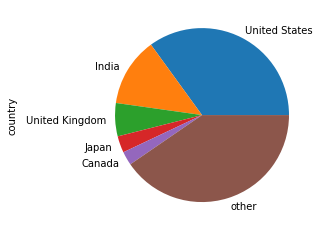

In [6]:
chart = out.plot(kind='pie', subplots=True)
for ax in chart:
    ax.set_aspect('equal')
    ax.yaxis.set_label_coords(-0.35, 0.5)
plt.subplots_adjust(wspace=0.5)
plt.show(chart)

In [7]:
#finding the most popular category/genres on the top 5 countries
top_5_countries = ['United States', 'India', 'Japan', 'Canada','United Kingdom']
filtered_data = ignore_nan[ignore_nan['country'].isin(top_5_countries)]
filtered_data
        

,country,listed_in,type
2265,Canada,Action & Adventure,Movie
5525,Canada,Action & Adventure,Movie
4137,Canada,"Action & Adventure, Children & Family Movies, ...",Movie
4088,Canada,"Action & Adventure, Comedies, International Mo...",Movie
4979,Canada,"Action & Adventure, Comedies, International Mo...",Movie
...,...,...,...
3875,United States,Thrillers,Movie
3911,United States,Thrillers,Movie
3972,United States,Thrillers,Movie
4772,United States,Thrillers,Movie


In [8]:
#frequency = filtered_data.groupby(['country', 'listed_in']).size().nlargest(5)
frequency = filtered_data.groupby(['country', 'listed_in']).count().sort_values('country').groupby(level=0).tail(1)
frequency

,,type
country,listed_in,
Canada,Documentaries,7
India,"Comedies, Dramas, International Movies",75
Japan,"Anime Series, Crime TV Shows, TV Thrillers",1
United Kingdom,"British TV Shows, Romantic TV Shows, TV Dramas",1
United States,Thrillers,25
